In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

One Hot Encoding for categorical variables

In [9]:
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Exploring Dta

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

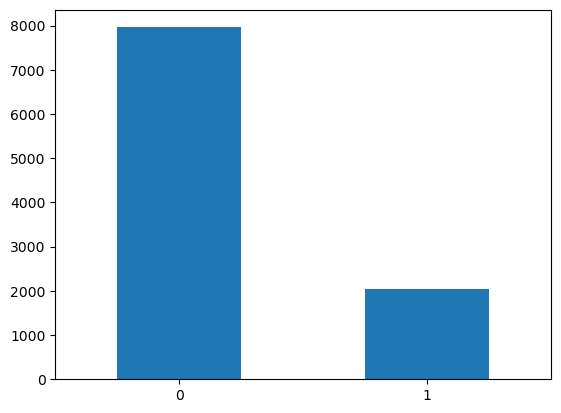

In [11]:
df["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

As we can see from the plot, the number of not_exited is significantly higher than exited, which can affect the model's performance.

In [12]:
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [13]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df_new = pd.concat([not_Exited , Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

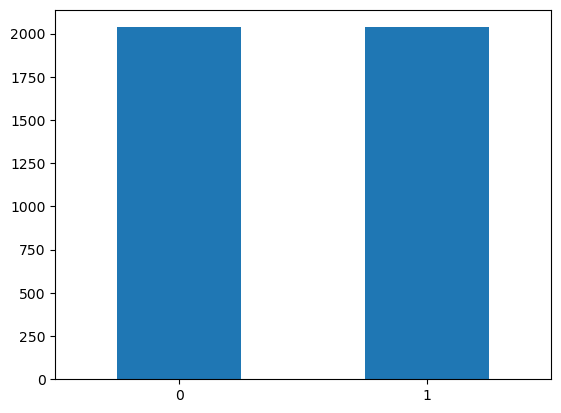

In [14]:
df_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [15]:
corr = df_new.corr()

<AxesSubplot:>

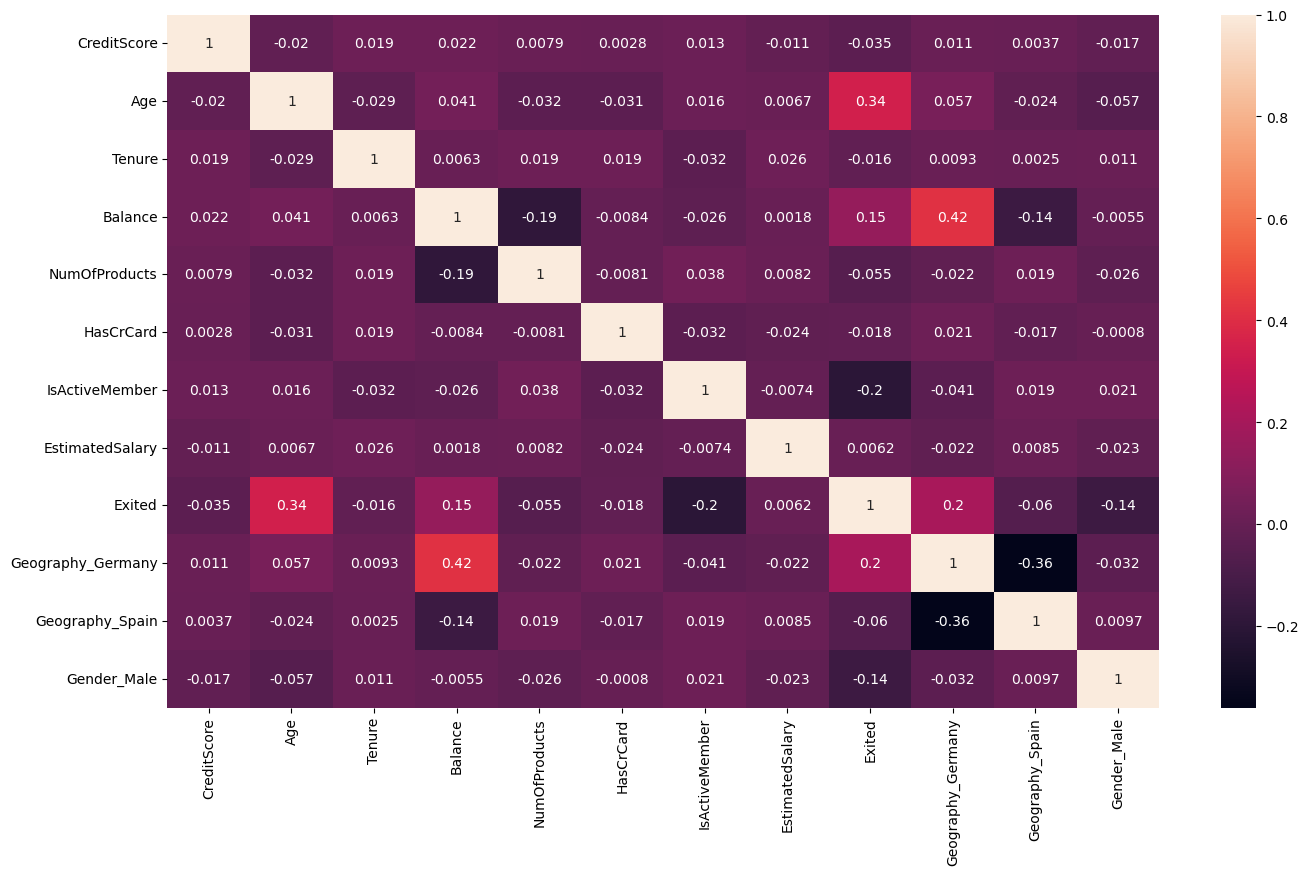

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot = True)

As we can see there is a stong correlation between age and exited columns

# MODELING

In [19]:
X = df_new.drop(columns = "Exited" , axis = 1)
y = df_new["Exited"]

In [21]:
from sklearn.preprocessing import StandardScaler
columns = df_new.columns.tolist() 
columns.remove('Exited')

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.437660,-0.391494,1.045749,1.187445,0.724545,0.643500,-0.925679,-0.208295,0,-0.663389,1.841219,0.977187
6409,0.350901,-0.766775,1.392065,-1.343806,0.724545,0.643500,1.080288,-1.080888,0,-0.663389,-0.543119,-1.023346
2157,0.975605,0.265248,-0.685832,-1.343806,0.724545,0.643500,1.080288,1.524534,0,-0.663389,-0.543119,-1.023346
1618,0.494275,-1.329697,1.045749,0.966753,0.724545,0.643500,-0.925679,-0.182420,0,-0.663389,-0.543119,0.977187
1633,-0.888267,-0.579134,0.699433,-1.343806,-0.760262,-1.554001,-0.925679,-0.905983,0,-0.663389,-0.543119,0.977187
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.543694,0.077608,-0.685832,1.143714,-0.760262,0.643500,1.080288,-0.826631,1,1.507411,-0.543119,0.977187
9982,0.064151,0.452889,0.699433,0.900024,-0.760262,0.643500,-0.925679,0.243434,1,1.507411,-0.543119,-1.023346
9991,-0.529830,1.109631,-0.339516,0.102198,-0.760262,0.643500,-0.925679,-0.550197,1,-0.663389,-0.543119,-1.023346
9997,0.617168,-0.485314,0.699433,-1.343806,-0.760262,-1.554001,1.080288,-1.023637,1,-0.663389,-0.543119,-1.023346


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=18),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [29]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [34]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
results_df


C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.720245,0.721346,0.720245,0.720583
Decision Tree,0.684663,0.684596,0.684663,0.684628
Random Forest,0.752147,0.751686,0.752147,0.751460
Gradient Boosting,0.775460,0.775128,0.775460,0.775152
XGBoost,0.753374,0.752941,0.753374,0.752964
SVC,0.763190,0.762794,0.763190,0.762797
KNN,0.738650,0.738107,0.738650,0.738055
Naive Bayes,0.727607,0.726986,0.727607,0.726659
AdaBoost,0.760736,0.760331,0.760736,0.760339


In [35]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = Gradient_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[357  86]
 [ 97 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       443
           1       0.76      0.74      0.75       372

    accuracy                           0.78       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.78      0.78      0.78       815



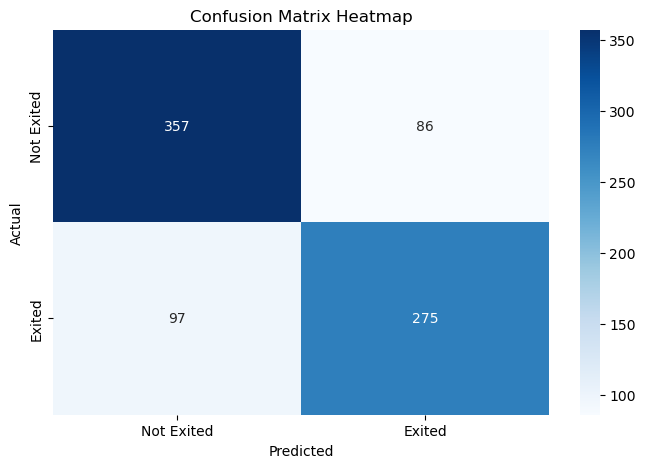

In [45]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [53]:
# Save the model to a file
import joblib
joblib.dump(Gradient_model, 'Gradient_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(columns,'columns.pkl')

['columns.pkl']

          --------------------------------------RAKESH RENUKUNTLA-----------------------------------------